In [1]:
#create linear regressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Load and partition data
df = pd.read_csv("../scans/scan7/scan7Clean.csv.zip")
# select nfp
nfp=3
df = df[df['nfp'] == nfp]
y = df.loc[:, ['rc1', 'zs1', 'eta']]

X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]


# Split training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, train_size=0.9,
                     random_state=0)

# Split training and validationsets
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_train, y_train, test_size=0.1, train_size=0.9,
                     random_state=0)

#scale
X_scaler = preprocessing.StandardScaler()
#X_scaler = preprocessing.RobustScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_validation_scaled =  X_scaler.transform(X_validation)

y_scaler = preprocessing.StandardScaler()
#y_scaler = preprocessing.RobustScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_validation_scaled =  y_scaler.transform(y_validation)


out={
    "index":[],
    "R2_validation":[]
}


#model = make_pipeline(preprocessing.PolynomialFeatures(degree=12), LinearRegression())

linearReg = LinearRegression()
linearReg.fit(X_train_scaled, y_train_scaled)

test_predictions = linearReg.predict(X_test_scaled)
validation_predictions = linearReg.predict(X_validation_scaled)


print("test stats:")
print("r2: ", r2_score(y_test_scaled, test_predictions))
print("mse: ", mean_squared_error(y_test_scaled, test_predictions))
print("\nvalidation stats:")
print("r2: ", r2_score(y_validation_scaled, validation_predictions))
print("mse: ", mean_squared_error(y_validation_scaled, validation_predictions))

test stats:
r2:  0.8724370200546349
mse:  0.1275347538318621

validation stats:
r2:  0.8669180923600232
mse:  0.13000740440964795


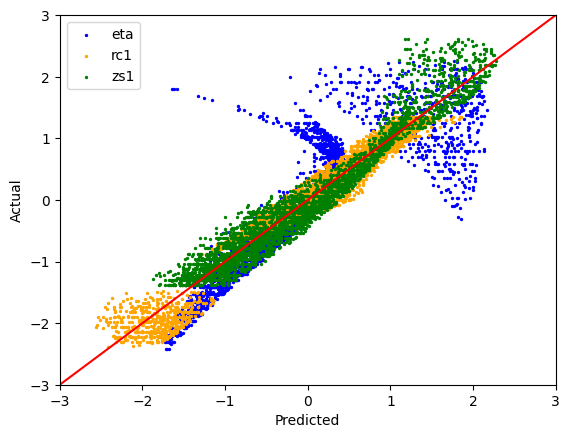

In [2]:
#plot linear regressor
fig, ax = plt.subplots()

ax.scatter(test_predictions[:,2],y_test_scaled[:,2], c="blue", label="eta",s=2)
ax.scatter(test_predictions[:,0],y_test_scaled[:,0], c="orange", label="rc1", s=2)
ax.scatter(test_predictions[:,1],y_test_scaled[:,1], c="green", label="zs1", s=2)

plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

In [3]:
#real error linear reg
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from qsc import Qsc
Y_LR = linearReg.predict(X_test_scaled)
Y_LR_unscaled = y_scaler.inverse_transform(Y_LR)

out = {
    "RotTrans" : [],
    "axLenght" : [],
    "max_elong" : [],
}

OutlierList = []
for i in range(len(Y_LR_unscaled)):
    rc1=Y_LR_unscaled[i][0]
    zs1=Y_LR_unscaled[i][1]
    eta=Y_LR_unscaled[i][2]
    stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=eta)
    out["RotTrans"].append(stel.iota)
    out["axLenght"].append(stel.axis_length / 2. / np.pi)
    out["max_elong"].append(stel.max_elongation)
    if stel.max_elongation > 15:
        print(i, " max elongation >15")
        OutlierList.append(i)

predictedX=pd.DataFrame(out)
print(df)

28  max elongation >15
33  max elongation >15
75  max elongation >15
81  max elongation >15
105  max elongation >15
112  max elongation >15
117  max elongation >15
120  max elongation >15
127  max elongation >15
159  max elongation >15
168  max elongation >15
180  max elongation >15
181  max elongation >15
182  max elongation >15
201  max elongation >15
203  max elongation >15
216  max elongation >15
235  max elongation >15
272  max elongation >15
275  max elongation >15
281  max elongation >15
308  max elongation >15
341  max elongation >15
349  max elongation >15
352  max elongation >15
378  max elongation >15
379  max elongation >15
393  max elongation >15
394  max elongation >15
397  max elongation >15
399  max elongation >15
405  max elongation >15
418  max elongation >15
435  max elongation >15
436  max elongation >15
441  max elongation >15
549  max elongation >15
551  max elongation >15
552  max elongation >15
558  max elongation >15
571  max elongation >15
593  max elongation 

non normalized
test stats:
r2:  -348.7632645080985


mse:  1008.9465373164011
mse Rotational Transform:  0.06086266201369519
mse Axis Length:  0.00022975793302682093
mse Max Elongation:  3026.7785195292563

normalized:
test stats:
r2:  -348.76326450809853
mse:  342.089493422287
mse Rotational Transform:  0.26659701148679465
mse Axis Length:  0.025519715698782443
mse Max Elongation:  1025.9763635396753


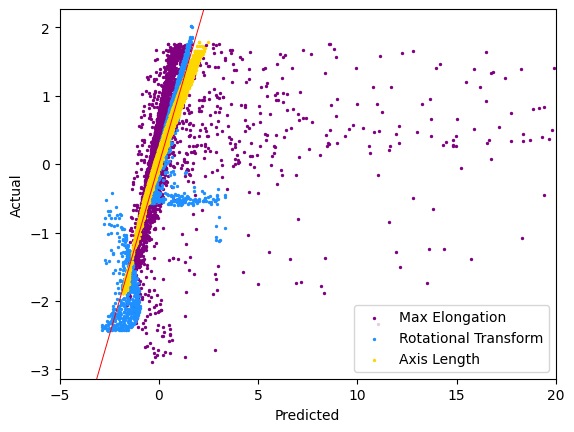

In [4]:
#plot linear regressor real error
print("non normalized")
print("test stats:")
print("r2: ", r2_score(X_test, predictedX))
print("mse: ", mean_squared_error(X_test, predictedX))
print("mse Rotational Transform: ", mean_squared_error(X_test["RotTrans"], predictedX["RotTrans"]))
print("mse Axis Length: ", mean_squared_error(X_test["axLenght"], predictedX["axLenght"]))
print("mse Max Elongation: ", mean_squared_error(X_test["max_elong"], predictedX["max_elong"]))


print("\nnormalized:")
predictedX_scaled = X_scaler.transform(predictedX)
print("test stats:")
print("r2: ", r2_score(X_test_scaled, predictedX_scaled))
print("mse: ", mean_squared_error(X_test_scaled, predictedX_scaled))
print("mse Rotational Transform: ", mean_squared_error(X_test_scaled[:,0], predictedX_scaled[:,0]))
print("mse Axis Length: ", mean_squared_error(X_test_scaled[:,1], predictedX_scaled[:,1]))
print("mse Max Elongation: ", mean_squared_error(X_test_scaled[:,2], predictedX_scaled[:,2]))


fig, ax = plt.subplots()
ax.scatter(predictedX_scaled[:,2],X_test_scaled[:,2], c="purple", label="Max Elongation", s=2)
ax.scatter(predictedX_scaled[:,0],X_test_scaled[:,0], c="dodgerblue", label="Rotational Transform",s=2)
ax.scatter(predictedX_scaled[:,1],X_test_scaled[:,1], c="gold", label="Axis Length", s=2)

plt.axline([0, 0], [1, 1], color='red', lw=0.7)
#plt.ylim(-3, 3)
plt.xlim(-5, 20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.legend()

In [6]:
#real error no outlier
print("outliers index:", OutlierList)
print("num Outlier", len(OutlierList))
print("non normalized without outliers")
X_testNoOutlier = X_test.copy()
X_testNoOutlier.reset_index(inplace=True)
predictedXNoOutlier = predictedX.drop(OutlierList)
X_testNoOutlier = X_testNoOutlier.drop(OutlierList)
print("mse Max Elongation: ", mean_squared_error(X_testNoOutlier["max_elong"], predictedXNoOutlier["max_elong"]))


print("normalized without outliers:")
X_test_scaledNoOutlier = X_test_scaled
predictedX_scaledNoOutlier = X_scaler.transform(predictedXNoOutlier)
X_test_scaledNoOutlier = X_test_scaled
X_test_scaledNoOutlier=np.delete(X_test_scaledNoOutlier,OutlierList,axis=0)
print("mse Max Elongation: ", mean_squared_error(X_test_scaledNoOutlier[:,2], predictedX_scaledNoOutlier[:,2]))


outliers index: [28, 33, 75, 81, 105, 112, 117, 120, 127, 159, 168, 180, 181, 182, 201, 203, 216, 235, 272, 275, 281, 308, 341, 349, 352, 378, 379, 393, 394, 397, 399, 405, 418, 435, 436, 441, 549, 551, 552, 558, 571, 593, 596, 609, 617, 633, 637, 640, 653, 654, 672, 730, 734, 777, 781, 794, 800, 841, 843, 848, 853, 882, 886, 896, 904, 906, 925, 926, 927, 936, 949, 950, 951, 953, 961, 967, 982, 1003, 1029, 1039, 1043, 1044, 1066, 1067, 1077, 1098, 1100, 1103, 1119, 1142, 1148, 1150, 1171, 1174, 1191, 1193, 1194, 1201, 1203, 1218, 1241, 1254, 1255, 1266, 1269, 1293, 1311, 1330, 1337, 1338, 1366, 1368, 1372, 1378, 1391, 1411, 1439, 1443, 1466, 1480, 1502, 1526, 1541, 1548, 1574, 1589, 1600, 1636, 1649, 1650, 1651, 1652, 1654, 1655, 1663, 1673, 1722, 1729, 1744, 1755, 1756, 1765, 1776, 1802, 1805, 1823, 1834, 1876, 1892, 1896, 1916, 1921, 1923, 1955, 1966, 1977, 1996, 2038, 2040, 2076, 2077, 2091, 2093, 2101, 2116, 2119, 2121, 2123, 2124, 2133, 2140, 2156, 2167, 2197, 2204, 2236, 2292, 23